# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp2 # use or create a database named demo
Final_project = db.Final_project 
Final_project.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [11]:
count = 100 #number of returned tweets, default and max is 100
geocode = "41.82399,-71.41283,100mi"  # defin the location, 
q = "COVID-19"                               #define the keywords, 

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [12]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        Final_project.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Dec 18 20:49:23 +0000 2020'
'Fri Dec 18 20:49:11 +0000 2020'
'Fri Dec 18 20:49:00 +0000 2020'
'Fri Dec 18 20:48:53 +0000 2020'
'Fri Dec 18 20:48:33 +0000 2020'
'Fri Dec 18 20:47:53 +0000 2020'
'Fri Dec 18 20:46:50 +0000 2020'
'Fri Dec 18 20:46:39 +0000 2020'
'Fri Dec 18 20:46:28 +0000 2020'
'Fri Dec 18 20:46:27 +0000 2020'
'Fri Dec 18 20:46:13 +0000 2020'
'Fri Dec 18 20:46:05 +0000 2020'
'Fri Dec 18 20:46:04 +0000 2020'
'Fri Dec 18 20:45:52 +0000 2020'
'Fri Dec 18 20:45:43 +0000 2020'
'Fri Dec 18 20:45:31 +0000 2020'
'Fri Dec 18 20:45:21 +0000 2020'
'Fri Dec 18 20:45:04 +0000 2020'
'Fri Dec 18 20:45:00 +0000 2020'
'Fri Dec 18 20:44:53 +0000 2020'
'Fri Dec 18 20:44:45 +0000 2020'
'Fri Dec 18 20:44:21 +0000 2020'
'Fri Dec 18 20:44:11 +0000 2020'
'Fri Dec 18 20:43:26 +0000 2020'
'Fri Dec 18 20:43:19 +0000 2020'
'Fri Dec 18 20:43:14 +0000 2020'
'Fri Dec 18 20:42:51 +0000 2020'
'Fri Dec 18 20:42:48 +0000 2020'
'Fri Dec 18 20:42:45 +0000 2020'
'Fri Dec 18 20:42:40 +0000 2020'
'Fri Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            Final_project.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Dec 18 20:23:50 +0000 2020'
'Fri Dec 18 20:23:49 +0000 2020'
'Fri Dec 18 20:23:46 +0000 2020'
'Fri Dec 18 20:23:45 +0000 2020'
'Fri Dec 18 20:23:34 +0000 2020'
'Fri Dec 18 20:23:27 +0000 2020'
'Fri Dec 18 20:23:10 +0000 2020'
'Fri Dec 18 20:22:56 +0000 2020'
'Fri Dec 18 20:22:44 +0000 2020'
'Fri Dec 18 20:22:41 +0000 2020'
'Fri Dec 18 20:22:35 +0000 2020'
'Fri Dec 18 20:22:05 +0000 2020'
'Fri Dec 18 20:21:46 +0000 2020'
'Fri Dec 18 20:21:37 +0000 2020'
'Fri Dec 18 20:21:21 +0000 2020'
'Fri Dec 18 20:20:25 +0000 2020'
'Fri Dec 18 20:20:17 +0000 2020'
'Fri Dec 18 20:20:07 +0000 2020'
'Fri Dec 18 20:20:06 +0000 2020'
'Fri Dec 18 20:19:41 +0000 2020'
'Fri Dec 18 20:19:23 +0000 2020'
'Fri Dec 18 20:19:19 +0000 2020'
'Fri Dec 18 20:19:18 +0000 2020'
'Fri Dec 18 20:19:13 +0000 2020'
'Fri Dec 18 20:19:05 +0000 2020'
'Fri Dec 18 20:19:00 +0000 2020'
'Fri Dec 18 20:18:44 +0000 2020'
'Fri Dec 18 20:18:41 +0000 2020'
'Fri Dec 18 20:18:25 +0000 2020'
'Fri Dec 18 20:18:04 +0000 2020'
'Fri Dec 1

'Fri Dec 18 19:26:04 +0000 2020'
'Fri Dec 18 19:25:15 +0000 2020'
'Fri Dec 18 19:25:05 +0000 2020'
'Fri Dec 18 19:25:03 +0000 2020'
'Fri Dec 18 19:24:57 +0000 2020'
'Fri Dec 18 19:24:56 +0000 2020'
'Fri Dec 18 19:24:51 +0000 2020'
'Fri Dec 18 19:24:20 +0000 2020'
'Fri Dec 18 19:23:35 +0000 2020'
'Fri Dec 18 19:23:00 +0000 2020'
'Fri Dec 18 19:22:57 +0000 2020'
'Fri Dec 18 19:22:41 +0000 2020'
'Fri Dec 18 19:22:20 +0000 2020'
'Fri Dec 18 19:22:11 +0000 2020'
'Fri Dec 18 19:22:05 +0000 2020'
'Fri Dec 18 19:21:15 +0000 2020'
'Fri Dec 18 19:21:15 +0000 2020'
'Fri Dec 18 19:21:06 +0000 2020'
'Fri Dec 18 19:20:28 +0000 2020'
'Fri Dec 18 19:20:23 +0000 2020'
'Fri Dec 18 19:20:22 +0000 2020'
'Fri Dec 18 19:19:59 +0000 2020'
'Fri Dec 18 19:19:37 +0000 2020'
'Fri Dec 18 19:19:35 +0000 2020'
'Fri Dec 18 19:19:15 +0000 2020'
'Fri Dec 18 19:18:57 +0000 2020'
'Fri Dec 18 19:18:11 +0000 2020'
'Fri Dec 18 19:18:11 +0000 2020'
'Fri Dec 18 19:18:10 +0000 2020'
'Fri Dec 18 19:18:07 +0000 2020'
'Fri Dec 1

'Fri Dec 18 18:23:23 +0000 2020'
'Fri Dec 18 18:23:05 +0000 2020'
'Fri Dec 18 18:22:59 +0000 2020'
'Fri Dec 18 18:22:44 +0000 2020'
'Fri Dec 18 18:22:33 +0000 2020'
'Fri Dec 18 18:22:19 +0000 2020'
'Fri Dec 18 18:22:06 +0000 2020'
'Fri Dec 18 18:21:23 +0000 2020'
'Fri Dec 18 18:21:13 +0000 2020'
'Fri Dec 18 18:20:51 +0000 2020'
'Fri Dec 18 18:20:24 +0000 2020'
'Fri Dec 18 18:20:05 +0000 2020'
'Fri Dec 18 18:19:52 +0000 2020'
'Fri Dec 18 18:19:43 +0000 2020'
'Fri Dec 18 18:19:40 +0000 2020'
'Fri Dec 18 18:19:38 +0000 2020'
'Fri Dec 18 18:19:15 +0000 2020'
'Fri Dec 18 18:18:52 +0000 2020'
'Fri Dec 18 18:18:52 +0000 2020'
'Fri Dec 18 18:18:32 +0000 2020'
'Fri Dec 18 18:17:54 +0000 2020'
'Fri Dec 18 18:17:15 +0000 2020'
'Fri Dec 18 18:17:04 +0000 2020'
'Fri Dec 18 18:17:00 +0000 2020'
'Fri Dec 18 18:16:59 +0000 2020'
'Fri Dec 18 18:16:57 +0000 2020'
'Fri Dec 18 18:16:47 +0000 2020'
'Fri Dec 18 18:16:39 +0000 2020'
'Fri Dec 18 18:16:36 +0000 2020'
'Fri Dec 18 18:15:51 +0000 2020'
'Fri Dec 1

'Fri Dec 18 17:26:12 +0000 2020'
'Fri Dec 18 17:26:08 +0000 2020'
'Fri Dec 18 17:25:46 +0000 2020'
'Fri Dec 18 17:25:44 +0000 2020'
'Fri Dec 18 17:25:08 +0000 2020'
'Fri Dec 18 17:24:52 +0000 2020'
'Fri Dec 18 17:24:37 +0000 2020'
'Fri Dec 18 17:24:31 +0000 2020'
'Fri Dec 18 17:24:17 +0000 2020'
'Fri Dec 18 17:23:34 +0000 2020'
'Fri Dec 18 17:23:26 +0000 2020'
'Fri Dec 18 17:22:59 +0000 2020'
'Fri Dec 18 17:22:45 +0000 2020'
'Fri Dec 18 17:21:15 +0000 2020'
'Fri Dec 18 17:21:10 +0000 2020'
'Fri Dec 18 17:20:18 +0000 2020'
'Fri Dec 18 17:19:52 +0000 2020'
'Fri Dec 18 17:19:35 +0000 2020'
'Fri Dec 18 17:19:00 +0000 2020'
'Fri Dec 18 17:19:00 +0000 2020'
'Fri Dec 18 17:18:15 +0000 2020'
'Fri Dec 18 17:16:11 +0000 2020'
'Fri Dec 18 17:15:57 +0000 2020'
'Fri Dec 18 17:15:14 +0000 2020'
'Fri Dec 18 17:15:14 +0000 2020'
'Fri Dec 18 17:15:05 +0000 2020'
'Fri Dec 18 17:15:03 +0000 2020'
'Fri Dec 18 17:14:42 +0000 2020'
'Fri Dec 18 17:14:31 +0000 2020'
'Fri Dec 18 17:14:27 +0000 2020'
'Fri Dec 1

'Fri Dec 18 16:18:25 +0000 2020'
'Fri Dec 18 16:18:05 +0000 2020'
'Fri Dec 18 16:17:28 +0000 2020'
'Fri Dec 18 16:17:27 +0000 2020'
'Fri Dec 18 16:17:16 +0000 2020'
'Fri Dec 18 16:17:03 +0000 2020'
'Fri Dec 18 16:16:41 +0000 2020'
'Fri Dec 18 16:16:34 +0000 2020'
'Fri Dec 18 16:15:20 +0000 2020'
'Fri Dec 18 16:15:15 +0000 2020'
'Fri Dec 18 16:14:57 +0000 2020'
'Fri Dec 18 16:14:50 +0000 2020'
'Fri Dec 18 16:14:40 +0000 2020'
'Fri Dec 18 16:13:52 +0000 2020'
'Fri Dec 18 16:13:42 +0000 2020'
'Fri Dec 18 16:13:38 +0000 2020'
'Fri Dec 18 16:13:18 +0000 2020'
'Fri Dec 18 16:13:15 +0000 2020'
'Fri Dec 18 16:12:34 +0000 2020'
'Fri Dec 18 16:12:33 +0000 2020'
'Fri Dec 18 16:11:48 +0000 2020'
'Fri Dec 18 16:11:33 +0000 2020'
'Fri Dec 18 16:11:29 +0000 2020'
'Fri Dec 18 16:11:28 +0000 2020'
'Fri Dec 18 16:10:51 +0000 2020'
'Fri Dec 18 16:10:42 +0000 2020'
'Fri Dec 18 16:10:23 +0000 2020'
'Fri Dec 18 16:10:23 +0000 2020'
'Fri Dec 18 16:09:50 +0000 2020'
'Fri Dec 18 16:09:24 +0000 2020'
'Fri Dec 1

'Fri Dec 18 15:27:47 +0000 2020'
'Fri Dec 18 15:27:47 +0000 2020'
'Fri Dec 18 15:27:41 +0000 2020'
'Fri Dec 18 15:27:33 +0000 2020'
'Fri Dec 18 15:27:32 +0000 2020'
'Fri Dec 18 15:27:26 +0000 2020'
'Fri Dec 18 15:27:26 +0000 2020'
'Fri Dec 18 15:27:18 +0000 2020'
'Fri Dec 18 15:27:00 +0000 2020'
'Fri Dec 18 15:26:52 +0000 2020'
'Fri Dec 18 15:26:47 +0000 2020'
'Fri Dec 18 15:26:46 +0000 2020'
'Fri Dec 18 15:26:39 +0000 2020'
'Fri Dec 18 15:26:29 +0000 2020'
'Fri Dec 18 15:26:21 +0000 2020'
'Fri Dec 18 15:26:12 +0000 2020'
'Fri Dec 18 15:26:11 +0000 2020'
'Fri Dec 18 15:25:52 +0000 2020'
'Fri Dec 18 15:25:49 +0000 2020'
'Fri Dec 18 15:25:23 +0000 2020'
'Fri Dec 18 15:25:19 +0000 2020'
'Fri Dec 18 15:25:07 +0000 2020'
'Fri Dec 18 15:24:45 +0000 2020'
'Fri Dec 18 15:24:20 +0000 2020'
'Fri Dec 18 15:24:08 +0000 2020'
'Fri Dec 18 15:23:59 +0000 2020'
'Fri Dec 18 15:23:49 +0000 2020'
'Fri Dec 18 15:23:48 +0000 2020'
'Fri Dec 18 15:23:44 +0000 2020'
'Fri Dec 18 15:23:28 +0000 2020'
'Fri Dec 1

'Fri Dec 18 14:44:21 +0000 2020'
'Fri Dec 18 14:44:12 +0000 2020'
'Fri Dec 18 14:44:03 +0000 2020'
'Fri Dec 18 14:43:56 +0000 2020'
'Fri Dec 18 14:43:47 +0000 2020'
'Fri Dec 18 14:43:31 +0000 2020'
'Fri Dec 18 14:43:27 +0000 2020'
'Fri Dec 18 14:43:26 +0000 2020'
'Fri Dec 18 14:43:20 +0000 2020'
'Fri Dec 18 14:43:13 +0000 2020'
'Fri Dec 18 14:42:57 +0000 2020'
'Fri Dec 18 14:42:54 +0000 2020'
'Fri Dec 18 14:42:25 +0000 2020'
'Fri Dec 18 14:42:22 +0000 2020'
'Fri Dec 18 14:41:29 +0000 2020'
'Fri Dec 18 14:41:13 +0000 2020'
'Fri Dec 18 14:41:06 +0000 2020'
'Fri Dec 18 14:40:50 +0000 2020'
'Fri Dec 18 14:40:41 +0000 2020'
'Fri Dec 18 14:40:21 +0000 2020'
'Fri Dec 18 14:40:16 +0000 2020'
'Fri Dec 18 14:40:14 +0000 2020'
'Fri Dec 18 14:40:07 +0000 2020'
'Fri Dec 18 14:40:04 +0000 2020'
'Fri Dec 18 14:39:01 +0000 2020'
'Fri Dec 18 14:38:33 +0000 2020'
'Fri Dec 18 14:38:29 +0000 2020'
'Fri Dec 18 14:38:26 +0000 2020'
'Fri Dec 18 14:38:09 +0000 2020'
'Fri Dec 18 14:37:50 +0000 2020'
'Fri Dec 1

'Fri Dec 18 13:49:02 +0000 2020'
'Fri Dec 18 13:48:28 +0000 2020'
'Fri Dec 18 13:47:57 +0000 2020'
'Fri Dec 18 13:47:57 +0000 2020'
'Fri Dec 18 13:47:49 +0000 2020'
'Fri Dec 18 13:47:45 +0000 2020'
'Fri Dec 18 13:47:40 +0000 2020'
'Fri Dec 18 13:47:27 +0000 2020'
'Fri Dec 18 13:47:16 +0000 2020'
'Fri Dec 18 13:47:10 +0000 2020'
'Fri Dec 18 13:47:04 +0000 2020'
'Fri Dec 18 13:46:47 +0000 2020'
'Fri Dec 18 13:46:47 +0000 2020'
'Fri Dec 18 13:46:46 +0000 2020'
'Fri Dec 18 13:46:46 +0000 2020'
'Fri Dec 18 13:46:37 +0000 2020'
'Fri Dec 18 13:46:37 +0000 2020'
'Fri Dec 18 13:46:34 +0000 2020'
'Fri Dec 18 13:46:18 +0000 2020'
'Fri Dec 18 13:46:06 +0000 2020'
'Fri Dec 18 13:46:03 +0000 2020'
'Fri Dec 18 13:45:59 +0000 2020'
'Fri Dec 18 13:45:49 +0000 2020'
'Fri Dec 18 13:45:45 +0000 2020'
'Fri Dec 18 13:45:13 +0000 2020'
'Fri Dec 18 13:45:12 +0000 2020'
'Fri Dec 18 13:44:50 +0000 2020'
'Fri Dec 18 13:44:30 +0000 2020'
'Fri Dec 18 13:44:03 +0000 2020'
'Fri Dec 18 13:44:03 +0000 2020'
'Fri Dec 1

'Fri Dec 18 13:01:37 +0000 2020'
'Fri Dec 18 13:01:33 +0000 2020'
'Fri Dec 18 13:01:15 +0000 2020'
'Fri Dec 18 13:01:09 +0000 2020'
'Fri Dec 18 13:01:05 +0000 2020'
'Fri Dec 18 13:00:53 +0000 2020'
'Fri Dec 18 13:00:36 +0000 2020'
'Fri Dec 18 13:00:33 +0000 2020'
'Fri Dec 18 13:00:21 +0000 2020'
'Fri Dec 18 13:00:17 +0000 2020'
'Fri Dec 18 13:00:15 +0000 2020'
'Fri Dec 18 13:00:02 +0000 2020'
'Fri Dec 18 12:59:38 +0000 2020'
'Fri Dec 18 12:59:03 +0000 2020'
'Fri Dec 18 12:58:51 +0000 2020'
'Fri Dec 18 12:58:51 +0000 2020'
'Fri Dec 18 12:58:32 +0000 2020'
'Fri Dec 18 12:58:00 +0000 2020'
'Fri Dec 18 12:56:07 +0000 2020'
'Fri Dec 18 12:55:31 +0000 2020'
'Fri Dec 18 12:55:27 +0000 2020'
'Fri Dec 18 12:54:50 +0000 2020'
'Fri Dec 18 12:54:37 +0000 2020'
'Fri Dec 18 12:54:21 +0000 2020'
'Fri Dec 18 12:54:18 +0000 2020'
'Fri Dec 18 12:53:39 +0000 2020'
'Fri Dec 18 12:53:22 +0000 2020'
'Fri Dec 18 12:53:14 +0000 2020'
'Fri Dec 18 12:53:11 +0000 2020'
'Fri Dec 18 12:52:15 +0000 2020'
'Fri Dec 1

'Fri Dec 18 11:17:13 +0000 2020'
'Fri Dec 18 11:16:54 +0000 2020'
'Fri Dec 18 11:16:31 +0000 2020'
'Fri Dec 18 11:14:44 +0000 2020'
'Fri Dec 18 11:14:05 +0000 2020'
'Fri Dec 18 11:14:02 +0000 2020'
'Fri Dec 18 11:13:18 +0000 2020'
'Fri Dec 18 11:12:47 +0000 2020'
'Fri Dec 18 11:11:35 +0000 2020'
'Fri Dec 18 11:11:34 +0000 2020'
'Fri Dec 18 11:09:37 +0000 2020'
'Fri Dec 18 11:09:21 +0000 2020'
'Fri Dec 18 11:07:31 +0000 2020'
'Fri Dec 18 11:06:44 +0000 2020'
'Fri Dec 18 11:06:16 +0000 2020'
'Fri Dec 18 11:06:12 +0000 2020'
'Fri Dec 18 11:04:47 +0000 2020'
'Fri Dec 18 11:02:09 +0000 2020'
'Fri Dec 18 11:02:02 +0000 2020'
'Fri Dec 18 11:01:39 +0000 2020'
'Fri Dec 18 11:00:55 +0000 2020'
'Fri Dec 18 11:00:26 +0000 2020'
'Fri Dec 18 10:59:34 +0000 2020'
'Fri Dec 18 10:58:07 +0000 2020'
'Fri Dec 18 10:58:07 +0000 2020'
'Fri Dec 18 10:57:06 +0000 2020'
'Fri Dec 18 10:56:28 +0000 2020'
'Fri Dec 18 10:56:23 +0000 2020'
'Fri Dec 18 10:55:36 +0000 2020'
'Fri Dec 18 10:53:39 +0000 2020'
'Fri Dec 1

'Fri Dec 18 07:10:15 +0000 2020'
'Fri Dec 18 07:10:06 +0000 2020'
'Fri Dec 18 07:09:23 +0000 2020'
'Fri Dec 18 07:09:04 +0000 2020'
'Fri Dec 18 07:08:34 +0000 2020'
'Fri Dec 18 07:05:10 +0000 2020'
'Fri Dec 18 07:03:34 +0000 2020'
'Fri Dec 18 07:03:20 +0000 2020'
'Fri Dec 18 07:03:05 +0000 2020'
'Fri Dec 18 07:00:52 +0000 2020'
'Fri Dec 18 06:58:28 +0000 2020'
'Fri Dec 18 06:57:23 +0000 2020'
'Fri Dec 18 06:56:18 +0000 2020'
'Fri Dec 18 06:52:53 +0000 2020'
'Fri Dec 18 06:52:32 +0000 2020'
'Fri Dec 18 06:50:18 +0000 2020'
'Fri Dec 18 06:47:47 +0000 2020'
'Fri Dec 18 06:47:15 +0000 2020'
'Fri Dec 18 06:47:08 +0000 2020'
'Fri Dec 18 06:46:27 +0000 2020'
'Fri Dec 18 06:46:16 +0000 2020'
'Fri Dec 18 06:44:41 +0000 2020'
'Fri Dec 18 06:44:26 +0000 2020'
'Fri Dec 18 06:42:04 +0000 2020'
'Fri Dec 18 06:39:32 +0000 2020'
'Fri Dec 18 06:39:13 +0000 2020'
'Fri Dec 18 06:39:01 +0000 2020'
'Fri Dec 18 06:39:01 +0000 2020'
'Fri Dec 18 06:36:20 +0000 2020'
'Fri Dec 18 06:36:02 +0000 2020'
'Fri Dec 1

'Fri Dec 18 03:59:38 +0000 2020'
'Fri Dec 18 03:59:36 +0000 2020'
'Fri Dec 18 03:59:32 +0000 2020'
'Fri Dec 18 03:59:18 +0000 2020'
'Fri Dec 18 03:58:57 +0000 2020'
'Fri Dec 18 03:58:24 +0000 2020'
'Fri Dec 18 03:58:21 +0000 2020'
'Fri Dec 18 03:58:20 +0000 2020'
'Fri Dec 18 03:58:05 +0000 2020'
'Fri Dec 18 03:57:43 +0000 2020'
'Fri Dec 18 03:57:32 +0000 2020'
'Fri Dec 18 03:57:10 +0000 2020'
'Fri Dec 18 03:56:14 +0000 2020'
'Fri Dec 18 03:55:16 +0000 2020'
'Fri Dec 18 03:53:45 +0000 2020'
'Fri Dec 18 03:52:02 +0000 2020'
'Fri Dec 18 03:51:37 +0000 2020'
'Fri Dec 18 03:51:03 +0000 2020'
'Fri Dec 18 03:50:34 +0000 2020'
'Fri Dec 18 03:49:45 +0000 2020'
'Fri Dec 18 03:49:13 +0000 2020'
'Fri Dec 18 03:49:04 +0000 2020'
'Fri Dec 18 03:48:38 +0000 2020'
'Fri Dec 18 03:48:35 +0000 2020'
'Fri Dec 18 03:47:29 +0000 2020'
'Fri Dec 18 03:47:21 +0000 2020'
'Fri Dec 18 03:46:07 +0000 2020'
'Fri Dec 18 03:46:05 +0000 2020'
'Fri Dec 18 03:43:12 +0000 2020'
'Fri Dec 18 03:42:53 +0000 2020'
'Fri Dec 1

'Fri Dec 18 02:28:29 +0000 2020'
'Fri Dec 18 02:28:21 +0000 2020'
'Fri Dec 18 02:28:20 +0000 2020'
'Fri Dec 18 02:28:13 +0000 2020'
'Fri Dec 18 02:28:05 +0000 2020'
'Fri Dec 18 02:27:43 +0000 2020'
'Fri Dec 18 02:27:13 +0000 2020'
'Fri Dec 18 02:26:12 +0000 2020'
'Fri Dec 18 02:25:45 +0000 2020'
'Fri Dec 18 02:25:41 +0000 2020'
'Fri Dec 18 02:25:36 +0000 2020'
'Fri Dec 18 02:25:05 +0000 2020'
'Fri Dec 18 02:23:28 +0000 2020'
'Fri Dec 18 02:23:11 +0000 2020'
'Fri Dec 18 02:20:57 +0000 2020'
'Fri Dec 18 02:19:44 +0000 2020'
'Fri Dec 18 02:18:46 +0000 2020'
'Fri Dec 18 02:18:44 +0000 2020'
'Fri Dec 18 02:18:22 +0000 2020'
'Fri Dec 18 02:18:18 +0000 2020'
'Fri Dec 18 02:17:37 +0000 2020'
'Fri Dec 18 02:17:19 +0000 2020'
'Fri Dec 18 02:16:35 +0000 2020'
'Fri Dec 18 02:16:31 +0000 2020'
'Fri Dec 18 02:16:30 +0000 2020'
'Fri Dec 18 02:16:14 +0000 2020'
'Fri Dec 18 02:15:45 +0000 2020'
'Fri Dec 18 02:15:03 +0000 2020'
'Fri Dec 18 02:14:43 +0000 2020'
'Fri Dec 18 02:14:27 +0000 2020'
'Fri Dec 1

'Fri Dec 18 01:10:04 +0000 2020'
'Fri Dec 18 01:10:01 +0000 2020'
'Fri Dec 18 01:09:56 +0000 2020'
'Fri Dec 18 01:09:29 +0000 2020'
'Fri Dec 18 01:08:45 +0000 2020'
'Fri Dec 18 01:08:40 +0000 2020'
'Fri Dec 18 01:07:52 +0000 2020'
'Fri Dec 18 01:07:21 +0000 2020'
'Fri Dec 18 01:06:53 +0000 2020'
'Fri Dec 18 01:06:32 +0000 2020'
'Fri Dec 18 01:06:15 +0000 2020'
'Fri Dec 18 01:05:48 +0000 2020'
'Fri Dec 18 01:05:31 +0000 2020'
'Fri Dec 18 01:05:28 +0000 2020'
'Fri Dec 18 01:05:27 +0000 2020'
'Fri Dec 18 01:05:00 +0000 2020'
'Fri Dec 18 01:04:34 +0000 2020'
'Fri Dec 18 01:03:51 +0000 2020'
'Fri Dec 18 01:03:41 +0000 2020'
'Fri Dec 18 01:03:13 +0000 2020'
'Fri Dec 18 01:03:13 +0000 2020'
'Fri Dec 18 01:03:09 +0000 2020'
'Fri Dec 18 01:03:05 +0000 2020'
'Fri Dec 18 01:02:28 +0000 2020'
'Fri Dec 18 01:01:47 +0000 2020'
'Fri Dec 18 01:01:13 +0000 2020'
'Fri Dec 18 01:01:12 +0000 2020'
'Fri Dec 18 01:00:45 +0000 2020'
'Fri Dec 18 01:00:34 +0000 2020'
'Fri Dec 18 01:00:32 +0000 2020'
'Fri Dec 1

'Fri Dec 18 00:06:52 +0000 2020'
'Fri Dec 18 00:06:48 +0000 2020'
'Fri Dec 18 00:06:44 +0000 2020'
'Fri Dec 18 00:06:30 +0000 2020'
'Fri Dec 18 00:06:08 +0000 2020'
'Fri Dec 18 00:05:33 +0000 2020'
'Fri Dec 18 00:05:09 +0000 2020'
'Fri Dec 18 00:05:06 +0000 2020'
'Fri Dec 18 00:04:57 +0000 2020'
'Fri Dec 18 00:04:10 +0000 2020'
'Fri Dec 18 00:03:43 +0000 2020'
'Fri Dec 18 00:03:01 +0000 2020'
'Fri Dec 18 00:02:54 +0000 2020'
'Fri Dec 18 00:02:42 +0000 2020'
'Fri Dec 18 00:02:41 +0000 2020'
'Fri Dec 18 00:02:27 +0000 2020'
'Fri Dec 18 00:02:06 +0000 2020'
'Fri Dec 18 00:02:01 +0000 2020'
'Fri Dec 18 00:01:28 +0000 2020'
'Fri Dec 18 00:01:01 +0000 2020'
'Fri Dec 18 00:00:53 +0000 2020'
'Fri Dec 18 00:00:52 +0000 2020'
'Fri Dec 18 00:00:06 +0000 2020'
'Fri Dec 18 00:00:02 +0000 2020'
'Thu Dec 17 23:59:59 +0000 2020'
'Thu Dec 17 23:59:54 +0000 2020'
'Thu Dec 17 23:59:36 +0000 2020'
'Thu Dec 17 23:59:11 +0000 2020'
'Thu Dec 17 23:59:10 +0000 2020'
'Thu Dec 17 23:58:48 +0000 2020'
'Thu Dec 1

'Thu Dec 17 23:16:15 +0000 2020'
'Thu Dec 17 23:15:49 +0000 2020'
'Thu Dec 17 23:15:43 +0000 2020'
'Thu Dec 17 23:15:25 +0000 2020'
'Thu Dec 17 23:15:17 +0000 2020'
'Thu Dec 17 23:15:16 +0000 2020'
'Thu Dec 17 23:15:15 +0000 2020'
'Thu Dec 17 23:15:09 +0000 2020'
'Thu Dec 17 23:15:06 +0000 2020'
'Thu Dec 17 23:15:01 +0000 2020'
'Thu Dec 17 23:14:57 +0000 2020'
'Thu Dec 17 23:14:55 +0000 2020'
'Thu Dec 17 23:14:51 +0000 2020'
'Thu Dec 17 23:14:47 +0000 2020'
'Thu Dec 17 23:14:42 +0000 2020'
'Thu Dec 17 23:14:15 +0000 2020'
'Thu Dec 17 23:13:25 +0000 2020'
'Thu Dec 17 23:13:21 +0000 2020'
'Thu Dec 17 23:13:20 +0000 2020'
'Thu Dec 17 23:13:09 +0000 2020'
'Thu Dec 17 23:12:55 +0000 2020'
'Thu Dec 17 23:12:42 +0000 2020'
'Thu Dec 17 23:12:39 +0000 2020'
'Thu Dec 17 23:12:34 +0000 2020'
'Thu Dec 17 23:12:33 +0000 2020'
'Thu Dec 17 23:12:28 +0000 2020'
'Thu Dec 17 23:12:23 +0000 2020'
'Thu Dec 17 23:11:51 +0000 2020'
'Thu Dec 17 23:11:49 +0000 2020'
'Thu Dec 17 23:11:47 +0000 2020'
'Thu Dec 1

'Thu Dec 17 22:37:29 +0000 2020'
'Thu Dec 17 22:37:19 +0000 2020'
'Thu Dec 17 22:37:14 +0000 2020'
'Thu Dec 17 22:37:13 +0000 2020'
'Thu Dec 17 22:37:10 +0000 2020'
'Thu Dec 17 22:37:07 +0000 2020'
'Thu Dec 17 22:37:04 +0000 2020'
'Thu Dec 17 22:36:50 +0000 2020'
'Thu Dec 17 22:36:47 +0000 2020'
'Thu Dec 17 22:36:42 +0000 2020'
'Thu Dec 17 22:36:20 +0000 2020'
'Thu Dec 17 22:36:00 +0000 2020'
'Thu Dec 17 22:35:54 +0000 2020'
'Thu Dec 17 22:35:48 +0000 2020'
'Thu Dec 17 22:35:47 +0000 2020'
'Thu Dec 17 22:35:33 +0000 2020'
'Thu Dec 17 22:35:25 +0000 2020'
'Thu Dec 17 22:35:03 +0000 2020'
'Thu Dec 17 22:34:43 +0000 2020'
'Thu Dec 17 22:34:33 +0000 2020'
'Thu Dec 17 22:34:32 +0000 2020'
'Thu Dec 17 22:34:17 +0000 2020'
'Thu Dec 17 22:34:17 +0000 2020'
'Thu Dec 17 22:34:17 +0000 2020'
'Thu Dec 17 22:34:13 +0000 2020'
'Thu Dec 17 22:34:11 +0000 2020'
'Thu Dec 17 22:34:10 +0000 2020'
'Thu Dec 17 22:34:05 +0000 2020'
'Thu Dec 17 22:33:45 +0000 2020'
'Thu Dec 17 22:33:16 +0000 2020'
'Thu Dec 1

'Thu Dec 17 21:57:26 +0000 2020'
'Thu Dec 17 21:57:16 +0000 2020'
'Thu Dec 17 21:56:59 +0000 2020'
'Thu Dec 17 21:56:42 +0000 2020'
'Thu Dec 17 21:56:37 +0000 2020'
'Thu Dec 17 21:56:30 +0000 2020'
'Thu Dec 17 21:56:04 +0000 2020'
'Thu Dec 17 21:55:58 +0000 2020'
'Thu Dec 17 21:55:28 +0000 2020'
'Thu Dec 17 21:55:24 +0000 2020'
'Thu Dec 17 21:54:50 +0000 2020'
'Thu Dec 17 21:54:16 +0000 2020'
'Thu Dec 17 21:54:13 +0000 2020'
'Thu Dec 17 21:53:57 +0000 2020'
'Thu Dec 17 21:53:36 +0000 2020'
'Thu Dec 17 21:53:17 +0000 2020'
'Thu Dec 17 21:53:10 +0000 2020'
'Thu Dec 17 21:52:50 +0000 2020'
'Thu Dec 17 21:52:40 +0000 2020'
'Thu Dec 17 21:51:50 +0000 2020'
'Thu Dec 17 21:51:41 +0000 2020'
'Thu Dec 17 21:51:31 +0000 2020'
'Thu Dec 17 21:51:30 +0000 2020'
'Thu Dec 17 21:50:58 +0000 2020'
'Thu Dec 17 21:50:52 +0000 2020'
'Thu Dec 17 21:50:26 +0000 2020'
'Thu Dec 17 21:50:18 +0000 2020'
'Thu Dec 17 21:50:18 +0000 2020'
'Thu Dec 17 21:50:09 +0000 2020'
'Thu Dec 17 21:49:25 +0000 2020'
'Thu Dec 1

'Thu Dec 17 21:00:56 +0000 2020'
'Thu Dec 17 21:00:45 +0000 2020'
'Thu Dec 17 21:00:26 +0000 2020'
'Thu Dec 17 21:00:24 +0000 2020'
'Thu Dec 17 21:00:12 +0000 2020'
'Thu Dec 17 21:00:11 +0000 2020'
'Thu Dec 17 21:00:04 +0000 2020'
'Thu Dec 17 21:00:01 +0000 2020'
'Thu Dec 17 21:00:01 +0000 2020'
'Thu Dec 17 20:59:46 +0000 2020'
'Thu Dec 17 20:59:39 +0000 2020'
'Thu Dec 17 20:59:05 +0000 2020'
'Thu Dec 17 20:59:00 +0000 2020'
'Thu Dec 17 20:57:55 +0000 2020'
'Thu Dec 17 20:57:28 +0000 2020'
'Thu Dec 17 20:57:16 +0000 2020'
'Thu Dec 17 20:57:06 +0000 2020'
'Thu Dec 17 20:56:39 +0000 2020'
'Thu Dec 17 20:56:02 +0000 2020'
'Thu Dec 17 20:55:46 +0000 2020'
'Thu Dec 17 20:55:32 +0000 2020'
'Thu Dec 17 20:55:20 +0000 2020'
'Thu Dec 17 20:55:03 +0000 2020'
'Thu Dec 17 20:54:50 +0000 2020'
'Thu Dec 17 20:54:47 +0000 2020'
'Thu Dec 17 20:54:46 +0000 2020'
'Thu Dec 17 20:54:41 +0000 2020'
'Thu Dec 17 20:54:03 +0000 2020'
'Thu Dec 17 20:53:54 +0000 2020'
'Thu Dec 17 20:53:52 +0000 2020'
'Thu Dec 1

'Thu Dec 17 19:53:54 +0000 2020'
'Thu Dec 17 19:53:27 +0000 2020'
'Thu Dec 17 19:53:24 +0000 2020'
'Thu Dec 17 19:53:17 +0000 2020'
'Thu Dec 17 19:53:14 +0000 2020'
'Thu Dec 17 19:53:09 +0000 2020'
'Thu Dec 17 19:52:12 +0000 2020'
'Thu Dec 17 19:51:59 +0000 2020'
'Thu Dec 17 19:51:54 +0000 2020'
'Thu Dec 17 19:51:38 +0000 2020'
'Thu Dec 17 19:51:27 +0000 2020'
'Thu Dec 17 19:51:26 +0000 2020'
'Thu Dec 17 19:51:02 +0000 2020'
'Thu Dec 17 19:49:55 +0000 2020'
'Thu Dec 17 19:49:50 +0000 2020'
'Thu Dec 17 19:49:39 +0000 2020'
'Thu Dec 17 19:49:38 +0000 2020'
'Thu Dec 17 19:49:11 +0000 2020'
'Thu Dec 17 19:48:49 +0000 2020'
'Thu Dec 17 19:48:39 +0000 2020'
'Thu Dec 17 19:48:08 +0000 2020'
'Thu Dec 17 19:48:03 +0000 2020'
'Thu Dec 17 19:47:50 +0000 2020'
'Thu Dec 17 19:47:35 +0000 2020'
'Thu Dec 17 19:46:24 +0000 2020'
'Thu Dec 17 19:46:22 +0000 2020'
'Thu Dec 17 19:45:57 +0000 2020'
'Thu Dec 17 19:45:14 +0000 2020'
'Thu Dec 17 19:45:05 +0000 2020'
'Thu Dec 17 19:44:54 +0000 2020'
'Thu Dec 1

'Thu Dec 17 18:44:34 +0000 2020'
'Thu Dec 17 18:44:29 +0000 2020'
'Thu Dec 17 18:44:28 +0000 2020'
'Thu Dec 17 18:44:22 +0000 2020'
'Thu Dec 17 18:44:04 +0000 2020'
'Thu Dec 17 18:43:38 +0000 2020'
'Thu Dec 17 18:43:06 +0000 2020'
'Thu Dec 17 18:43:00 +0000 2020'
'Thu Dec 17 18:42:56 +0000 2020'
'Thu Dec 17 18:42:45 +0000 2020'
'Thu Dec 17 18:42:45 +0000 2020'
'Thu Dec 17 18:42:44 +0000 2020'
'Thu Dec 17 18:42:44 +0000 2020'
'Thu Dec 17 18:42:43 +0000 2020'
'Thu Dec 17 18:42:10 +0000 2020'
'Thu Dec 17 18:41:59 +0000 2020'
'Thu Dec 17 18:41:47 +0000 2020'
'Thu Dec 17 18:41:42 +0000 2020'
'Thu Dec 17 18:41:42 +0000 2020'
'Thu Dec 17 18:41:37 +0000 2020'
'Thu Dec 17 18:41:16 +0000 2020'
'Thu Dec 17 18:40:50 +0000 2020'
'Thu Dec 17 18:40:42 +0000 2020'
'Thu Dec 17 18:40:28 +0000 2020'
'Thu Dec 17 18:40:24 +0000 2020'
'Thu Dec 17 18:40:08 +0000 2020'
'Thu Dec 17 18:40:04 +0000 2020'
'Thu Dec 17 18:40:00 +0000 2020'
'Thu Dec 17 18:39:53 +0000 2020'
'Thu Dec 17 18:39:36 +0000 2020'
'Thu Dec 1

'Thu Dec 17 17:39:17 +0000 2020'
'Thu Dec 17 17:39:08 +0000 2020'
'Thu Dec 17 17:39:00 +0000 2020'
'Thu Dec 17 17:38:41 +0000 2020'
'Thu Dec 17 17:37:44 +0000 2020'
'Thu Dec 17 17:37:18 +0000 2020'
'Thu Dec 17 17:37:10 +0000 2020'
'Thu Dec 17 17:37:07 +0000 2020'
'Thu Dec 17 17:37:05 +0000 2020'
'Thu Dec 17 17:36:23 +0000 2020'
'Thu Dec 17 17:36:16 +0000 2020'
'Thu Dec 17 17:36:05 +0000 2020'
'Thu Dec 17 17:34:58 +0000 2020'
'Thu Dec 17 17:34:50 +0000 2020'
'Thu Dec 17 17:34:13 +0000 2020'
'Thu Dec 17 17:34:09 +0000 2020'
'Thu Dec 17 17:34:07 +0000 2020'
'Thu Dec 17 17:34:05 +0000 2020'
'Thu Dec 17 17:34:04 +0000 2020'
'Thu Dec 17 17:34:01 +0000 2020'
'Thu Dec 17 17:32:51 +0000 2020'
'Thu Dec 17 17:32:14 +0000 2020'
'Thu Dec 17 17:31:21 +0000 2020'
'Thu Dec 17 17:31:14 +0000 2020'
'Thu Dec 17 17:31:09 +0000 2020'
'Thu Dec 17 17:31:05 +0000 2020'
'Thu Dec 17 17:31:03 +0000 2020'
'Thu Dec 17 17:30:56 +0000 2020'
'Thu Dec 17 17:30:35 +0000 2020'
'Thu Dec 17 17:30:35 +0000 2020'
'Thu Dec 1

'Thu Dec 17 16:30:08 +0000 2020'
'Thu Dec 17 16:30:01 +0000 2020'
'Thu Dec 17 16:29:44 +0000 2020'
'Thu Dec 17 16:29:43 +0000 2020'
'Thu Dec 17 16:29:41 +0000 2020'
'Thu Dec 17 16:29:32 +0000 2020'
'Thu Dec 17 16:29:30 +0000 2020'
'Thu Dec 17 16:29:23 +0000 2020'
'Thu Dec 17 16:29:10 +0000 2020'
'Thu Dec 17 16:28:54 +0000 2020'
'Thu Dec 17 16:28:42 +0000 2020'
'Thu Dec 17 16:28:06 +0000 2020'
'Thu Dec 17 16:27:56 +0000 2020'
'Thu Dec 17 16:27:52 +0000 2020'
'Thu Dec 17 16:26:58 +0000 2020'
'Thu Dec 17 16:26:57 +0000 2020'
'Thu Dec 17 16:26:35 +0000 2020'
'Thu Dec 17 16:26:20 +0000 2020'
'Thu Dec 17 16:26:03 +0000 2020'
'Thu Dec 17 16:25:01 +0000 2020'
'Thu Dec 17 16:24:00 +0000 2020'
'Thu Dec 17 16:23:54 +0000 2020'
'Thu Dec 17 16:23:44 +0000 2020'
'Thu Dec 17 16:23:41 +0000 2020'
'Thu Dec 17 16:23:07 +0000 2020'
'Thu Dec 17 16:23:00 +0000 2020'
'Thu Dec 17 16:22:46 +0000 2020'
'Thu Dec 17 16:22:24 +0000 2020'
'Thu Dec 17 16:22:22 +0000 2020'
'Thu Dec 17 16:22:09 +0000 2020'
'Thu Dec 1

'Thu Dec 17 15:35:19 +0000 2020'
'Thu Dec 17 15:35:16 +0000 2020'
'Thu Dec 17 15:35:06 +0000 2020'
'Thu Dec 17 15:34:46 +0000 2020'
'Thu Dec 17 15:34:14 +0000 2020'
'Thu Dec 17 15:33:51 +0000 2020'
'Thu Dec 17 15:33:10 +0000 2020'
'Thu Dec 17 15:33:07 +0000 2020'
'Thu Dec 17 15:33:02 +0000 2020'
'Thu Dec 17 15:32:53 +0000 2020'
'Thu Dec 17 15:32:22 +0000 2020'
'Thu Dec 17 15:32:03 +0000 2020'
'Thu Dec 17 15:31:53 +0000 2020'
'Thu Dec 17 15:31:49 +0000 2020'
'Thu Dec 17 15:31:46 +0000 2020'
'Thu Dec 17 15:30:29 +0000 2020'
'Thu Dec 17 15:30:25 +0000 2020'
'Thu Dec 17 15:30:23 +0000 2020'
'Thu Dec 17 15:30:08 +0000 2020'
'Thu Dec 17 15:29:59 +0000 2020'
'Thu Dec 17 15:29:15 +0000 2020'
'Thu Dec 17 15:28:47 +0000 2020'
'Thu Dec 17 15:28:30 +0000 2020'
'Thu Dec 17 15:28:16 +0000 2020'
'Thu Dec 17 15:28:13 +0000 2020'
'Thu Dec 17 15:27:35 +0000 2020'
'Thu Dec 17 15:27:07 +0000 2020'
'Thu Dec 17 15:25:36 +0000 2020'
'Thu Dec 17 15:25:29 +0000 2020'
'Thu Dec 17 15:24:04 +0000 2020'
'Thu Dec 1

'Thu Dec 17 14:42:11 +0000 2020'
'Thu Dec 17 14:42:06 +0000 2020'
'Thu Dec 17 14:41:49 +0000 2020'
'Thu Dec 17 14:41:09 +0000 2020'
'Thu Dec 17 14:41:05 +0000 2020'
'Thu Dec 17 14:40:40 +0000 2020'
'Thu Dec 17 14:40:31 +0000 2020'
'Thu Dec 17 14:39:43 +0000 2020'
'Thu Dec 17 14:39:28 +0000 2020'
'Thu Dec 17 14:39:13 +0000 2020'
'Thu Dec 17 14:39:12 +0000 2020'
'Thu Dec 17 14:38:44 +0000 2020'
'Thu Dec 17 14:38:42 +0000 2020'
'Thu Dec 17 14:38:41 +0000 2020'
'Thu Dec 17 14:38:27 +0000 2020'
'Thu Dec 17 14:38:25 +0000 2020'
'Thu Dec 17 14:37:58 +0000 2020'
'Thu Dec 17 14:37:54 +0000 2020'
'Thu Dec 17 14:37:38 +0000 2020'
'Thu Dec 17 14:37:37 +0000 2020'
'Thu Dec 17 14:37:26 +0000 2020'
'Thu Dec 17 14:37:20 +0000 2020'
'Thu Dec 17 14:37:18 +0000 2020'
'Thu Dec 17 14:36:43 +0000 2020'
'Thu Dec 17 14:36:17 +0000 2020'
'Thu Dec 17 14:36:09 +0000 2020'
'Thu Dec 17 14:36:08 +0000 2020'
'Thu Dec 17 14:36:02 +0000 2020'
'Thu Dec 17 14:35:56 +0000 2020'
'Thu Dec 17 14:35:29 +0000 2020'
'Thu Dec 1

'Thu Dec 17 13:39:17 +0000 2020'
'Thu Dec 17 13:39:17 +0000 2020'
'Thu Dec 17 13:39:02 +0000 2020'
'Thu Dec 17 13:38:34 +0000 2020'
'Thu Dec 17 13:38:33 +0000 2020'
'Thu Dec 17 13:38:19 +0000 2020'
'Thu Dec 17 13:38:15 +0000 2020'
'Thu Dec 17 13:38:00 +0000 2020'
'Thu Dec 17 13:37:45 +0000 2020'
'Thu Dec 17 13:36:51 +0000 2020'
'Thu Dec 17 13:36:19 +0000 2020'
'Thu Dec 17 13:36:17 +0000 2020'
'Thu Dec 17 13:36:14 +0000 2020'
'Thu Dec 17 13:35:51 +0000 2020'
'Thu Dec 17 13:35:40 +0000 2020'
'Thu Dec 17 13:34:54 +0000 2020'
'Thu Dec 17 13:34:51 +0000 2020'
'Thu Dec 17 13:34:29 +0000 2020'
'Thu Dec 17 13:34:21 +0000 2020'
'Thu Dec 17 13:34:14 +0000 2020'
'Thu Dec 17 13:33:57 +0000 2020'
'Thu Dec 17 13:33:42 +0000 2020'
'Thu Dec 17 13:33:40 +0000 2020'
'Thu Dec 17 13:33:21 +0000 2020'
'Thu Dec 17 13:33:00 +0000 2020'
'Thu Dec 17 13:32:46 +0000 2020'
'Thu Dec 17 13:32:09 +0000 2020'
'Thu Dec 17 13:32:08 +0000 2020'
'Thu Dec 17 13:32:07 +0000 2020'
'Thu Dec 17 13:31:37 +0000 2020'
'Thu Dec 1

'Thu Dec 17 12:15:02 +0000 2020'
'Thu Dec 17 12:14:10 +0000 2020'
'Thu Dec 17 12:13:36 +0000 2020'
'Thu Dec 17 12:13:28 +0000 2020'
'Thu Dec 17 12:12:52 +0000 2020'
'Thu Dec 17 12:12:19 +0000 2020'
'Thu Dec 17 12:11:23 +0000 2020'
'Thu Dec 17 12:11:20 +0000 2020'
'Thu Dec 17 12:10:23 +0000 2020'
'Thu Dec 17 12:09:01 +0000 2020'
'Thu Dec 17 12:08:02 +0000 2020'
'Thu Dec 17 12:07:48 +0000 2020'
'Thu Dec 17 12:07:26 +0000 2020'
'Thu Dec 17 12:07:24 +0000 2020'
'Thu Dec 17 12:05:52 +0000 2020'
'Thu Dec 17 12:05:00 +0000 2020'
'Thu Dec 17 12:04:17 +0000 2020'
'Thu Dec 17 12:04:01 +0000 2020'
'Thu Dec 17 12:03:55 +0000 2020'
'Thu Dec 17 12:03:50 +0000 2020'
'Thu Dec 17 12:03:29 +0000 2020'
'Thu Dec 17 12:03:17 +0000 2020'
'Thu Dec 17 12:02:52 +0000 2020'
'Thu Dec 17 12:02:42 +0000 2020'
'Thu Dec 17 12:02:09 +0000 2020'
'Thu Dec 17 12:02:00 +0000 2020'
'Thu Dec 17 12:01:59 +0000 2020'
'Thu Dec 17 12:01:41 +0000 2020'
'Thu Dec 17 12:01:29 +0000 2020'
'Thu Dec 17 12:01:20 +0000 2020'
'Thu Dec 1

'Thu Dec 17 08:53:08 +0000 2020'
'Thu Dec 17 08:49:49 +0000 2020'
'Thu Dec 17 08:46:20 +0000 2020'
'Thu Dec 17 08:46:14 +0000 2020'
'Thu Dec 17 08:45:29 +0000 2020'
'Thu Dec 17 08:43:56 +0000 2020'
'Thu Dec 17 08:41:17 +0000 2020'
'Thu Dec 17 08:36:44 +0000 2020'
'Thu Dec 17 08:34:38 +0000 2020'
'Thu Dec 17 08:30:48 +0000 2020'
'Thu Dec 17 08:30:47 +0000 2020'
'Thu Dec 17 08:29:15 +0000 2020'
'Thu Dec 17 08:27:23 +0000 2020'
'Thu Dec 17 08:21:37 +0000 2020'
'Thu Dec 17 08:21:07 +0000 2020'
'Thu Dec 17 08:20:36 +0000 2020'
'Thu Dec 17 08:20:31 +0000 2020'
'Thu Dec 17 08:18:42 +0000 2020'
'Thu Dec 17 08:16:52 +0000 2020'
'Thu Dec 17 08:16:23 +0000 2020'
'Thu Dec 17 08:16:22 +0000 2020'
'Thu Dec 17 08:16:20 +0000 2020'
'Thu Dec 17 08:16:19 +0000 2020'
'Thu Dec 17 08:16:19 +0000 2020'
'Thu Dec 17 08:16:18 +0000 2020'
'Thu Dec 17 08:16:18 +0000 2020'
'Thu Dec 17 08:16:17 +0000 2020'
'Thu Dec 17 08:16:15 +0000 2020'
'Thu Dec 17 08:12:28 +0000 2020'
'Thu Dec 17 08:08:50 +0000 2020'
'Thu Dec 1

'Thu Dec 17 05:09:47 +0000 2020'
'Thu Dec 17 05:09:31 +0000 2020'
'Thu Dec 17 05:09:19 +0000 2020'
'Thu Dec 17 05:08:35 +0000 2020'
'Thu Dec 17 05:08:14 +0000 2020'
'Thu Dec 17 05:08:09 +0000 2020'
'Thu Dec 17 05:06:59 +0000 2020'
'Thu Dec 17 05:06:54 +0000 2020'
'Thu Dec 17 05:04:38 +0000 2020'
'Thu Dec 17 05:04:22 +0000 2020'
'Thu Dec 17 05:03:06 +0000 2020'
'Thu Dec 17 05:02:55 +0000 2020'
'Thu Dec 17 05:02:50 +0000 2020'
'Thu Dec 17 05:02:31 +0000 2020'
'Thu Dec 17 05:01:30 +0000 2020'
'Thu Dec 17 05:01:22 +0000 2020'
'Thu Dec 17 05:00:33 +0000 2020'
'Thu Dec 17 05:00:08 +0000 2020'
'Thu Dec 17 05:00:02 +0000 2020'
'Thu Dec 17 04:59:29 +0000 2020'
'Thu Dec 17 04:59:28 +0000 2020'
'Thu Dec 17 04:59:12 +0000 2020'
'Thu Dec 17 04:58:04 +0000 2020'
'Thu Dec 17 04:57:06 +0000 2020'
'Thu Dec 17 04:56:21 +0000 2020'
'Thu Dec 17 04:55:35 +0000 2020'
'Thu Dec 17 04:55:32 +0000 2020'
'Thu Dec 17 04:55:20 +0000 2020'
'Thu Dec 17 04:54:26 +0000 2020'
'Thu Dec 17 04:53:48 +0000 2020'
'Thu Dec 1

'Thu Dec 17 03:18:14 +0000 2020'
'Thu Dec 17 03:18:12 +0000 2020'
'Thu Dec 17 03:18:02 +0000 2020'
'Thu Dec 17 03:18:01 +0000 2020'
'Thu Dec 17 03:17:42 +0000 2020'
'Thu Dec 17 03:17:38 +0000 2020'
'Thu Dec 17 03:17:22 +0000 2020'
'Thu Dec 17 03:16:57 +0000 2020'
'Thu Dec 17 03:16:52 +0000 2020'
'Thu Dec 17 03:16:26 +0000 2020'
'Thu Dec 17 03:16:23 +0000 2020'
'Thu Dec 17 03:16:20 +0000 2020'
'Thu Dec 17 03:15:53 +0000 2020'
'Thu Dec 17 03:15:48 +0000 2020'
'Thu Dec 17 03:15:00 +0000 2020'
'Thu Dec 17 03:14:57 +0000 2020'
'Thu Dec 17 03:14:51 +0000 2020'
'Thu Dec 17 03:14:24 +0000 2020'
'Thu Dec 17 03:14:12 +0000 2020'
'Thu Dec 17 03:13:59 +0000 2020'
'Thu Dec 17 03:13:53 +0000 2020'
'Thu Dec 17 03:13:52 +0000 2020'
'Thu Dec 17 03:13:44 +0000 2020'
'Thu Dec 17 03:13:33 +0000 2020'
'Thu Dec 17 03:11:59 +0000 2020'
'Thu Dec 17 03:11:01 +0000 2020'
'Thu Dec 17 03:11:00 +0000 2020'
'Thu Dec 17 03:10:57 +0000 2020'
'Thu Dec 17 03:10:10 +0000 2020'
'Thu Dec 17 03:09:55 +0000 2020'
'Thu Dec 1

'Thu Dec 17 02:10:54 +0000 2020'
'Thu Dec 17 02:10:48 +0000 2020'
'Thu Dec 17 02:10:24 +0000 2020'
'Thu Dec 17 02:09:19 +0000 2020'
'Thu Dec 17 02:09:15 +0000 2020'
'Thu Dec 17 02:09:11 +0000 2020'
'Thu Dec 17 02:08:55 +0000 2020'
'Thu Dec 17 02:08:53 +0000 2020'
'Thu Dec 17 02:08:50 +0000 2020'
'Thu Dec 17 02:07:41 +0000 2020'
'Thu Dec 17 02:07:33 +0000 2020'
'Thu Dec 17 02:07:11 +0000 2020'
'Thu Dec 17 02:07:06 +0000 2020'
'Thu Dec 17 02:07:01 +0000 2020'
'Thu Dec 17 02:06:57 +0000 2020'
'Thu Dec 17 02:06:48 +0000 2020'
'Thu Dec 17 02:06:48 +0000 2020'
'Thu Dec 17 02:06:47 +0000 2020'
'Thu Dec 17 02:06:23 +0000 2020'
'Thu Dec 17 02:06:01 +0000 2020'
'Thu Dec 17 02:05:30 +0000 2020'
'Thu Dec 17 02:05:13 +0000 2020'
'Thu Dec 17 02:05:11 +0000 2020'
'Thu Dec 17 02:04:56 +0000 2020'
'Thu Dec 17 02:04:47 +0000 2020'
'Thu Dec 17 02:04:39 +0000 2020'
'Thu Dec 17 02:04:38 +0000 2020'
'Thu Dec 17 02:03:23 +0000 2020'
'Thu Dec 17 02:02:52 +0000 2020'
'Thu Dec 17 02:02:50 +0000 2020'
'Thu Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [14]:
print(Final_project.estimated_document_count())# number of tweets collected

user_cursor = Final_project.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

8216
6161


Create a text index and print the Tweets containing specific keywords. 

In [15]:
Final_project.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [16]:
tweet_cursor = Final_project.find({"$text": {"$search": "coronavirus"}}) # return tweets 

Use pprint to display tweets

In [17]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Demi P. #Georgia #Vote #OssoffandWarnockForSenate
text: #Pfizervaccine 
#coronavirus 
#PfizerCOVIDvaccine 
#coronavirus 
#COVID 
#warehouse 
#TrumpIsACriminal… https://t.co/U27Zqx0UwB
----
name: Demi P. #Georgia #Vote #OssoffandWarnockForSenate
text: RT @demipal: #Pfizervaccine 
#coronavirus 
#PfizerCOVIDvaccine 
#coronavirus 
#COVID 
#warehouse 
#TrumpIsACriminal 
#GOPGenocide 
#GOPCorr…
----
name: Jerry Lanson
text: Let's hope #Biden wasn't exposed. He needs to get the vaccine, yesterday. #coronavirus #Richmond #coronavirus… https://t.co/D3ZUrcKzC4
----
name: Jerry Lanson
text: Make this headline your mantra. #Covid_19 #coronavirus #pandemic https://t.co/jOZAcAI78W
----
name: Joshua Balling
text: First #Nantucket #coronavirus vaccine administered to hospital PA:
https://t.co/zmcwt4Ti2V
----
name: Demi P. #Georgia #Vote #OssoffandWarnockForSenate
text: #PfizerCOVIDvaccine 
#PfizerBioNTech 
#Pfizervaccine 
#CovidVaccines 
#CovidVaccine 
#coronavirus 
#Covid_19… https://t.co/

In [18]:
tweet_cursor = Final_project.find({"$text": {"$search": "coronavirus"}}) # return tweets 

Use pandas to display tweets

In [19]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities
0,5fdd16d5df7303fe1f6fa3a1,Thu Dec 17 21:27:55 +0000 2020,1339683770144796673,1339683770144796673,#Pfizervaccine \n#coronavirus \n#PfizerCOVIDva...,True,"{'hashtags': [{'text': 'Pfizervaccine', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1339645951896678402,{'created_at': 'Thu Dec 17 18:57:39 +0000 2020...,1,0,False,False,False,en,NaN,NaN
1,5fdd16d0df7303fe1f6fa1ba,Thu Dec 17 22:49:07 +0000 2020,1339704205976727553,1339704205976727553,RT @demipal: #Pfizervaccine \n#coronavirus \n#...,False,"{'hashtags': [{'text': 'Pfizervaccine', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1339645951896678402,NaN,1,0,False,False,NaN,en,{'created_at': 'Thu Dec 17 21:27:55 +0000 2020...,NaN
2,5fdd16c5df7303fe1f6f9d66,Fri Dec 18 03:09:46 +0000 2020,1339769800512421888,1339769800512421888,Let's hope #Biden wasn't exposed. He needs to ...,True,"{'hashtags': [{'text': 'Biden', 'indices': [11...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,0,0,False,False,False,en,NaN,NaN
3,5fdd16c5df7303fe1f6f9d8f,Fri Dec 18 02:58:54 +0000 2020,1339767063229964288,1339767063229964288,Make this headline your mantra. #Covid_19 #cor...,False,"{'hashtags': [{'text': 'Covid_19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,0,0,False,False,False,en,NaN,NaN
4,5fdd16e7df7303fe1f6faa47,Thu Dec 17 14:50:07 +0000 2020,1339583658177556481,1339583658177556481,First #Nantucket #coronavirus vaccine administ...,False,"{'hashtags': [{'text': 'Nantucket', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,...,NaN,NaN,1,3,False,False,False,en,NaN,NaN
5,5fdd16d2df7303fe1f6fa251,Thu Dec 17 22:30:55 +0000 2020,1339699623586361345,1339699623586361345,#PfizerCOVIDvaccine \n#PfizerBioNTech \n#Pfize...,True,"{'hashtags': [{'text': 'PfizerCOVIDvaccine', '...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1339681262844473344,{'created_at': 'Thu Dec 17 21:17:57 +0000 2020...,0,0,False,False,False,en,NaN,NaN
6,5fdd16cadf7303fe1f6f9f75,Fri Dec 18 00:42:57 +0000 2020,1339732853022732288,1339732853022732288,"Coronavirus (COVID-19) Update: December 17, 20...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,0,0,False,False,False,en,NaN,NaN
7,5fdd16c1df7303fe1f6f9bd0,Fri Dec 18 07:30:29 +0000 2020,1339835409778548736,1339835409778548736,The doctors were fighting for her life for two...,False,"{'hashtags': [{'text': 'hungary', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://dailynewshungary.com"" rel=""no...",NaN,...,NaN,NaN,2,5,False,False,False,en,NaN,NaN
8,5fdd16f6df7303fe1f6fb019,Thu Dec 17 02:48:08 +0000 2020,1339401968410771456,1339401968410771456,Rep. Joe Wilson tests positive for Covid-19 ht...,False,"{'hashtags': [{'text': 'coronavirus', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,0,0,False,False,False,en,NaN,NaN
9,5fdd16aadf7303fe1f6f92fa,Fri Dec 18 19:00:36 +0000 2020,1340009084075053057,1340009084075053057,#rent #landlord #landlords #apartmentliving #R...,True,"{'hashtags': [{'text': 'rent', 'indices': [0, ...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN

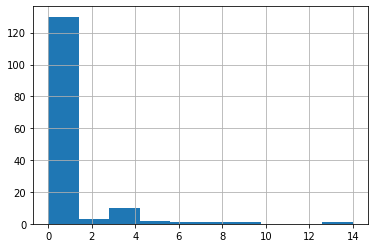

In [20]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count